In [1]:
### importing packages

import csv
import pandas as pd
import igraph
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import os


In [2]:
nodes_df = pd.read_csv('reachability-meta.csv')
nodes_df

,node_id,name,metro_pop,latitude,longitude
0,0,"Abbotsford, BC",133497.0,49.051575,-122.328849
1,1,"Aberdeen, SD",40878.0,45.459090,-98.487324
2,2,"Abilene, TX",166416.0,32.449175,-99.741424
3,3,"Akron/Canton, OH",701456.0,40.797810,-81.371567
4,4,"Alamosa, CO",9433.0,37.468180,-105.873599
...,...,...,...,...,...
451,451,"Winnipeg, MB",672129.0,49.899425,-97.140739
452,452,"Worland, WY",5454.0,44.016835,-107.955114
453,453,"Yakima, WA",247141.0,46.604135,-120.507049
454,454,"Yellowknife, NT",17863.0,62.454320,-114.371254


In [30]:
edges_df = pd.read_csv('reachability.csv', header=None)
edges_df.columns = ['Departure City', 'Destination City', 'Time travelled']
edges_df

,Departure City,Destination City,Time travelled
0,27,0,757
1,57,0,84
2,70,0,1290
3,74,0,465
4,86,0,700
...,...,...,...
71954,419,455,154
71955,428,455,341
71956,434,455,403
71957,440,455,680


In [3]:
# Load using igraph's pickle method
loaded_graph = igraph.Graph.Read_Pickle('../graph_dir/graph_igraph.pkl')

## Degree Centrality

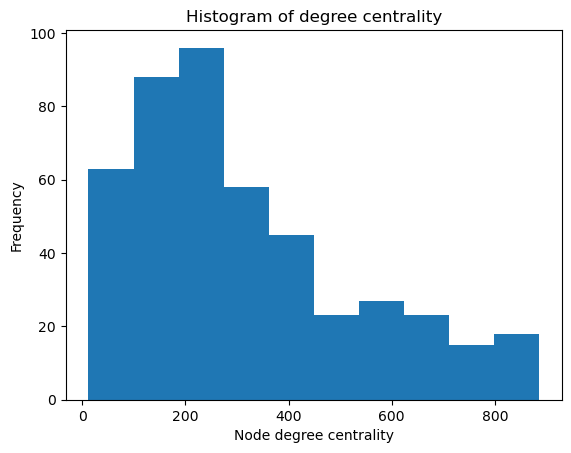

In [11]:
plt.hist(loaded_graph.degree())
plt.xlabel('Node degree centrality')
plt.ylabel('Frequency')
plt.title('Histogram of degree centrality')
plt.show()

In [39]:
# Below are the nodes with most connections in the graph
degree = list(zip(loaded_graph.vs['city_names'], loaded_graph.degree()))
sorted_degree = sorted(degree, key=lambda x: x[1], reverse=True)
print(sorted_degree[:10])

[('Los Angeles, CA', 886), ('San Francisco, CA', 871), ('Las Vegas, NV', 861), ('Chicago, IL', 859), ('Dallas/Fort Worth, TX', 859), ('Denver, CO', 856), ('New York, NY', 856), ('Washington, DC', 852), ('Phoenix, AZ', 847), ('Seattle/Tacoma, WA', 824)]


### Betweeness Centrality

In [6]:
betweenness_weighted = loaded_graph.betweenness(weights=loaded_graph.es['travel_time'])

In [7]:
# Below are the top 10 nodes with most connections in the graph
betweenness = list(zip(loaded_graph.vs['city_names'], betweenness_weighted))
sorted_betweenness = sorted(betweenness, key=lambda x: x[1], reverse=True)
print(sorted_betweenness[:10])

[('Denver, CO', 36898.666666666664), ('Minneapolis/St Paul, MN', 34685.33333333333), ('Chicago, IL', 19676.41666666667), ('Atlanta, GA', 17996.16666666667), ('Dallas/Fort Worth, TX', 15734.916666666668), ('Pittsburgh, PA', 12671.5), ('Seattle/Tacoma, WA', 12195.166666666668), ('St. Louis, MO', 11847.166666666668), ('Toronto, ON', 11771.666666666666), ('Montreal, QC', 11161.666666666668)]


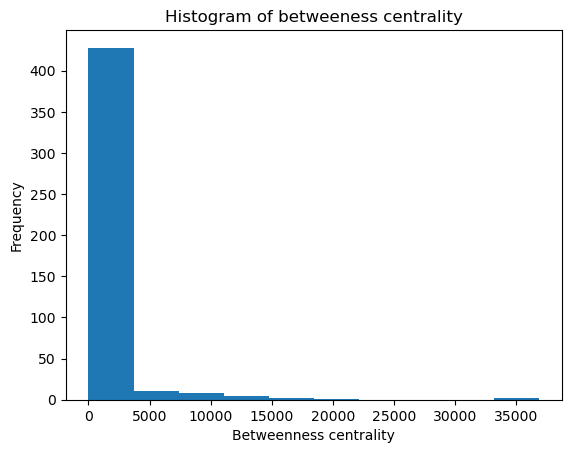

In [13]:
plt.hist(betweenness_weighted)
plt.xlabel('Betweenness centrality')
plt.ylabel('Frequency')
plt.title('Histogram of betweeness centrality')
plt.show()

## Number of Connected Components
### There's only one cluster in the graph. All the nodes have connectivity with each other in the graph

In [5]:
connected_components = loaded_graph.connected_components()
print(connected_components) 

Clustering with 456 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
    75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
    93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
    109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
    124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
    139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
    154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
    169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
    184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
    199, 200, 201, 202,

### Community Detection

In [9]:
g_u = loaded_graph.as_undirected() #converting directed graph as undirected
community_membership = g_u.community_multilevel()
print(f'The number of the communities in the graph {len(community_membership)}')

The number of the communities in the graph 3


In [11]:
for i, community in enumerate(community_membership):
    size = len(community)
    print(f'Community: {i}, size: {size}')

Community: 0, size: 166
Community: 1, size: 131
Community: 2, size: 159


In [15]:
smallest_community = sorted(list(community_membership), key=len)[0]
print(f'The node IDs wihtin the smallest community: {smallest_community}')

The node IDs wihtin the smallest community: [1, 4, 7, 10, 13, 14, 17, 23, 27, 36, 38, 41, 45, 46, 47, 49, 53, 56, 60, 62, 63, 64, 68, 72, 75, 78, 79, 80, 82, 86, 91, 93, 103, 104, 106, 111, 112, 114, 115, 116, 118, 121, 122, 125, 126, 133, 134, 145, 147, 149, 151, 152, 156, 164, 167, 171, 172, 173, 176, 182, 184, 185, 186, 192, 193, 195, 202, 204, 206, 221, 224, 228, 236, 238, 239, 240, 243, 257, 260, 261, 266, 271, 273, 278, 281, 283, 290, 293, 300, 301, 302, 304, 307, 311, 313, 316, 318, 325, 328, 329, 337, 344, 345, 346, 349, 351, 356, 360, 366, 369, 370, 372, 373, 374, 382, 389, 394, 398, 399, 404, 409, 412, 419, 422, 424, 435, 437, 444, 448, 452, 455]


In [23]:
smallest_community_nodes = loaded_graph.vs[smallest_community]
smallest_community_nodes[0]

igraph.Vertex(<igraph.Graph object at 0x117e54350>, 1, {'city_names': 'Aberdeen, SD', 'city_ids': 1})

### Making use of the Neo4j Database Graph 

In [4]:
# Initialize the Neo4j driver using the retrieved credentials
driver = GraphDatabase.driver(uri='bolt://localhost:7687', auth=('neo4j', 'password'))


session = driver.session()

In [ ]:
query = """LOAD CSV WITH HEADERS from 'file:///reachability-meta.csv' as row
CREATE (city:City {
    node_id: toInteger(row.node_id),
    name: row.name,
    population: toInteger(row.metro_pop),
    latitude: toFloat(row.latitude),
    longitude: toFloat(row.longitude)
})
"""
#result = session.run(query)

In [ ]:
query = """LOAD CSV from 'file:///reachability.csv' as row
MATCH (from:City {node_id: toInteger(row[0])})
MATCH (to:City {node_id: toInteger(row[1])})
MERGE (from)-[:AIR_TRAVEL {travel_time: toInteger(row[2])}]-(to)
"""
#result = session.run(query)

In [5]:
edge_test = [57, 0]
cypher = f'MATCH (n:City {{node_id:{edge_test[0]}}})' \
          '-[r:AIR_TRAVEL]->' \
         f'(m:City {{node_id:{edge_test[1]}}}) ' \
          'RETURN n.name, m.name, r.travel_time'
#print(cypher)

result = session.run(cypher)
print(result.data())

[{'n.name': 'Calgary, AB', 'm.name': 'Abbotsford, BC', 'r.travel_time': 84}]


In [6]:
#City with Largest population

In [7]:
cypher = 'MATCH (n) ' \
         'RETURN n.name, n.population ' \
         'ORDER BY n.population ' \
         'DESC LIMIT 1'
result = session.run(cypher).data()
print(result)

[{'n.name': 'New York, NY', 'n.population': 19020000}]


In [8]:
#What cities can be travelled from NY under 100 mins

In [9]:
cypher = 'MATCH (n:City {name: "New York, NY"}) ' \
         'MATCH (n)-[r:AIR_TRAVEL]->(m) ' \
         'WHERE r.travel_time < 100 ' \
         'RETURN m.name'
result = session.run(cypher).data()
pd.DataFrame(result)

,m.name
0,"Manchester, NH"
1,"Ottawa, ON"
2,"Nantucket, MA"
3,"Montreal, QC"
4,"Norfolk/Virginia Beach/Williamsburg, VA"
5,"Albany, NY"
6,"Syracuse, NY"
7,"Cleveland, OH"
8,"Greensboro/High Point/Winston Salem, NC"
9,"Providence, RI"


## Further work

 1. Integration of  Neo4j with FastAPI via Docker Compose
 2. Set up CI/CD pipeline on Github using Github Actions workflow and AWS Cloud deployment services like Elastic Container Service or Lambda